In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_excel('C:\\Users\\DELL\\Desktop\\Practice\\data\\House_prices_preprocessed.xlsx')

In [4]:
df.head(3)

,Price,SqFt,No_bricks,Bricks,East,North,West,2_Bedroom,3_Bedroom,4_Bedroom,5_Bedroom,2_Bathroom,3_Bathroom,4_Bathroom,Offer1,Offer2,Offer3,Offer4,Offer5,Offer6
0,114300,1790,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,114200,2030,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2,114800,1740,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [5]:
df.columns

Index(['Price', 'SqFt', 'No_bricks', 'Bricks', 'East', 'North', 'West',
       '2_Bedroom', '3_Bedroom', '4_Bedroom', '5_Bedroom', '2_Bathroom',
       '3_Bathroom', '4_Bathroom', 'Offer1', 'Offer2', 'Offer3', 'Offer4',
       'Offer5', 'Offer6'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 20 columns):
Price         128 non-null int64
SqFt          128 non-null int64
No_bricks     128 non-null int64
Bricks        128 non-null int64
East          128 non-null int64
North         128 non-null int64
West          128 non-null int64
2_Bedroom     128 non-null int64
3_Bedroom     128 non-null int64
4_Bedroom     128 non-null int64
5_Bedroom     128 non-null int64
2_Bathroom    128 non-null int64
3_Bathroom    128 non-null int64
4_Bathroom    128 non-null int64
Offer1        128 non-null int64
Offer2        128 non-null int64
Offer3        128 non-null int64
Offer4        128 non-null int64
Offer5        128 non-null int64
Offer6        128 non-null int64
dtypes: int64(20)
memory usage: 20.1 KB


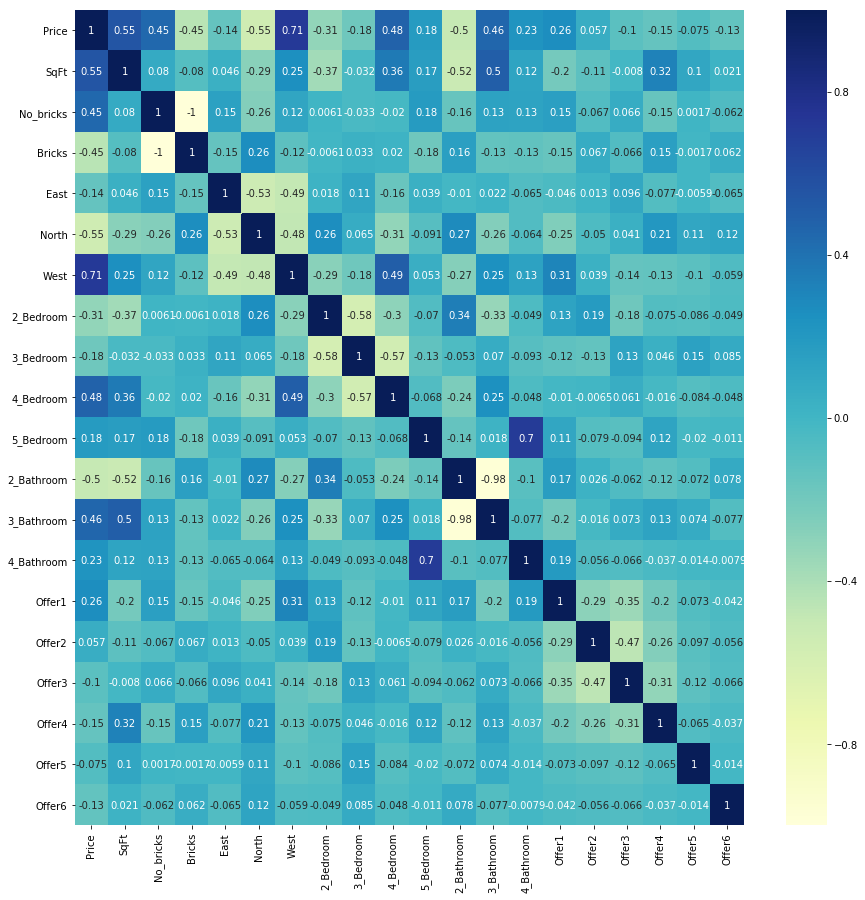

In [7]:
fig, ax = plt.subplots(figsize=(15,15))  
corr=df.corr()
sns.heatmap(corr,cmap="YlGnBu",annot=True,ax=ax)


In [8]:
#storing independent and dependent values in X and y respectively
X = df[['SqFt', 'No_bricks', 'Bricks', 'East', 'North', 'West',
       '2_Bedroom', '3_Bedroom', '4_Bedroom', '5_Bedroom', '2_Bathroom',
       '3_Bathroom', '4_Bathroom', 'Offer1', 'Offer2', 'Offer3', 'Offer4',
       'Offer5', 'Offer6']]
y = df['Price']

In [9]:
#split data to test and train in 80:20 80% data for train and remaining 20% as test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=101)

In [10]:
#fit the x and y train data using linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
#predict using x test linear regression predictor
predictions = lm.predict(X_test)

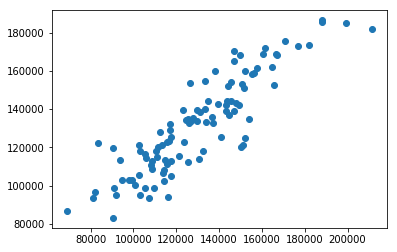

In [12]:
# test contains the data that can be used to compare our predicted prices
#plot the predicted vs test data
plt.scatter(y_test,predictions)

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


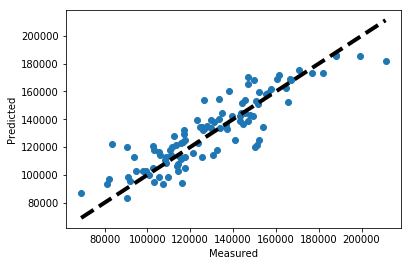

In [13]:
fig,ax = plt.subplots()
ax.scatter(y_test,predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

In [14]:
predictions

array([138823.25658618, 138823.25658618, 117973.96196903, 152046.8745634 ,
       135769.00463482, 116551.46400675, 142089.54643796, 121331.95524956,
       117927.67831864, 108197.84363137, 154543.98080987, 162168.12754224,
       144331.11884975, 134769.12473572, 159824.25031831, 152498.20501708,
       170342.11215118, 153931.82623254, 128005.37382392, 106720.90048194,
       142532.56118216, 144309.84439703, 153596.52832805, 114060.27407082,
       100225.71898091, 111311.3156782 , 134298.8423954 , 112673.31228919,
       112534.05630425, 121288.09922194, 185244.48277279,  98734.3497649 ,
       186444.53613481, 120319.67084147, 150980.22603282, 143408.81580945,
       108662.26884034, 173089.37913914, 142076.0073302 , 113131.19012052,
       102709.8570331 ,  93455.77166112, 124786.71759298, 132467.33107009,
       114671.36462564, 168231.31103752, 168830.91407692, 115433.9075648 ,
       113399.75953129,  94925.93390054,  98624.4927318 , 139649.7371703 ,
       165305.45600658, 1

In [20]:
Predicted_prices=pd.DataFrame(data={"id":X_test.iloc[:,0],"Prediction":predictions}) 

In [21]:
Predicted_prices.head(3)

,id,Prediction
16,2190,138823.256586
80,2190,138823.256586
120,1930,117973.961969


In [22]:
Predicted_prices.to_csv('C:\\Users\\DELL\\Desktop\\Practice\\data\\Predicted_prices.csv')